## ICESat-2 ATL03 SlideRule Demo

Plot ATL03 data with different classifications for a region over the Grand Mesa, CO region 

- [ATL08 Land and Vegetation Height product](https://nsidc.org/data/atl08) photon classification
- Experimental YAPC (Yet Another Photon Classification) photon-density-based classification

### What is demonstrated

* The `icesat2.atl03sp` API is used to perform a SlideRule parallel subsetting request of the Grand Mesa region
* The `earthdata.cmr` API's is used to find specific ATL03 granules corresponding to the Grand Mesa region
* The `matplotlib` package is used to plot the ATL03 data subset by SlideRule

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sliderule import sliderule, icesat2, earthdata

/srv/conda/envs/notebook/lib/python3.10/site-packages/sliderule/sliderule.py:41: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas


In [2]:
url = "slideruleearth.io"
icesat2.init(url, verbose=False)
asset = "icesat2"

## Intro
This notebook demonstrates how to use the SlideRule Icesat-2 API to retrieve ATL03 data with two different classifications, one based on the external ATL08-product classifications, designed to distinguish between vegetation and ground returns, and the other based on the experimental YAPC (Yet Another Photon Class) algorithm.

### Retrieve ATL03 elevations with ATL08 classifications

define a polygon to encompass Grand Mesa, and pick an ATL03 granule that has good coverage over the top of the mesa.  Note that this granule was captured at night, under clear-sky conditions.  Other granules are unlikely to have results as clear s these.

In [3]:
%%time

# build sliderule parameters for ATL03 subsetting request
# SRT_LAND = 0
# SRT_OCEAN = 1
# SRT_SEA_ICE = 2
# SRT_LAND_ICE = 3
# SRT_INLAND_WATER = 4
parms = {
    # processing parameters
    "srt": icesat2.SRT_LAND,
    "len": 20,
    # classification and checks
    # still return photon segments that fail checks
    "pass_invalid": True, 
    # all photons
    "cnf": -2, 
    # all land classification flags
    "atl08_class": ["atl08_noise", "atl08_ground", "atl08_canopy", "atl08_top_of_canopy", "atl08_unclassified"],
    # all photons
    "yapc": dict(knn=0, win_h=6, win_x=11, min_ph=4, score=0), 
}

# ICESat-2 data release
release = '005'
# region of interest
poly = [{'lat': 39.34603060272382, 'lon': -108.40601489205419},
  {'lat': 39.32770853617356, 'lon': -107.68485163209928},
  {'lat': 38.770676045922684, 'lon': -107.71081820956682},
  {'lat': 38.788639821001155, 'lon': -108.42635020791396},
  {'lat': 39.34603060272382, 'lon': -108.40601489205419}]
# time bounds for CMR query
time_start = '2019-11-14'
time_end = '2019-11-15'

# find granule for each region of interest
granules_list = earthdata.cmr(short_name='ATL03', polygon=poly, time_start=time_start, time_end=time_end, version=release)

# create an empty geodataframe
parms["poly"] = poly
gdf = icesat2.atl03sp(parms, asset=asset, version=release, resources=granules_list)

CPU times: user 49 s, sys: 1.88 s, total: 50.9 s
Wall time: 57.7 s


In [4]:
gdf.head()

,segment_id,track,segment_dist,sc_orient,background_rate,cycle,solar_elevation,rgt,landcover,snowcover,quality_ph,atl03_cnf,relief,yapc_score,height,atl08_class,distance,pair,geometry,spot
time,,,,,,,,,,,,,,,,,,,,
2019-11-14 03:46:35.872218112,215142,3,4.314540e+06,1,5359.800287,5,-44.078053,737,255,255,0,4,0.0,242,1507.737427,1,-9.798330,0,POINT (-108.04141 38.77892),2
2019-11-14 03:46:35.872218112,215142,3,4.314540e+06,1,5359.800287,5,-44.078053,737,255,255,0,4,0.0,237,1507.654053,1,-9.797953,0,POINT (-108.04141 38.77892),2
2019-11-14 03:46:35.872317952,215142,3,4.314540e+06,1,5359.800287,5,-44.078053,737,255,255,0,4,0.0,242,1507.816284,1,-9.087481,0,POINT (-108.04141 38.77893),2
2019-11-14 03:46:35.872317952,215142,3,4.314540e+06,1,5359.800287,5,-44.078053,737,255,255,0,4,0.0,230,1508.157227,1,-9.088234,0,POINT (-108.04141 38.77893),2
2019-11-14 03:46:35.872418048,215142,3,4.314540e+06,1,5359.800287,5,-44.078053,737,255,255,0,4,0.0,241,1508.089478,1,-8.377385,0,POINT (-108.04141 38.77893),2


### Reduce GeoDataFrame to plot a single beam
- Convert coordinate reference system to compound projection

In [5]:
def reduce_dataframe(gdf, RGT=None, GT=None, track=None, pair=None, cycle=None, beam='', crs=4326):
    # convert coordinate reference system
    D3 = gdf.to_crs(crs)
    # reduce to reference ground track
    if RGT is not None:
        D3 = D3[D3["rgt"] == RGT]
    # reduce to ground track (gt[123][lr]), track ([123]), or pair (l=0, r=1) 
    gtlookup = {icesat2.GT1L: 1, icesat2.GT1R: 1, icesat2.GT2L: 2, icesat2.GT2R: 2, icesat2.GT3L: 3, icesat2.GT3R: 3}
    pairlookup = {icesat2.GT1L: 0, icesat2.GT1R: 1, icesat2.GT2L: 0, icesat2.GT2R: 1, icesat2.GT3L: 0, icesat2.GT3R: 1}
    if GT is not None:
        D3 = D3[(D3["track"] == gtlookup[GT]) & (D3["pair"] == pairlookup[GT])]
    if track is not None:
        D3 = D3[D3["track"] == track]
    if pair is not None:
        D3 = D3[D3["pair"] == pair]
    # reduce to weak or strong beams
    # tested on cycle 11, where the strong beam in the pair matches the spacecraft orientation.
    # Need to check on other cycles
    if (beam == 'strong'):
        D3 = D3[D3['sc_orient'] == D3['pair']]
    elif (beam == 'weak'):
        D3 = D3[D3['sc_orient'] != D3['pair']]
    # reduce to cycle
    if cycle is not None:
        D3 = D3[D3["cycle"] == cycle]
    # otherwise, return both beams
    return D3

In [6]:
beam_type = 'strong'
project_srs = "EPSG:26912+EPSG:5703"
D3 = reduce_dataframe(gdf, RGT=737, track=1, beam='strong', crs=project_srs)

### Inspect Coordinate Reference System

In [7]:
D3.crs

<Compound CRS: EPSG:26912+EPSG:5703>
Name: NAD83 / UTM zone 12N + NAVD88 height
Axis Info [cartesian|vertical]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
- H[up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83 / UTM zone 12N
- NAVD88 height

### Plot the ATL08 classifications

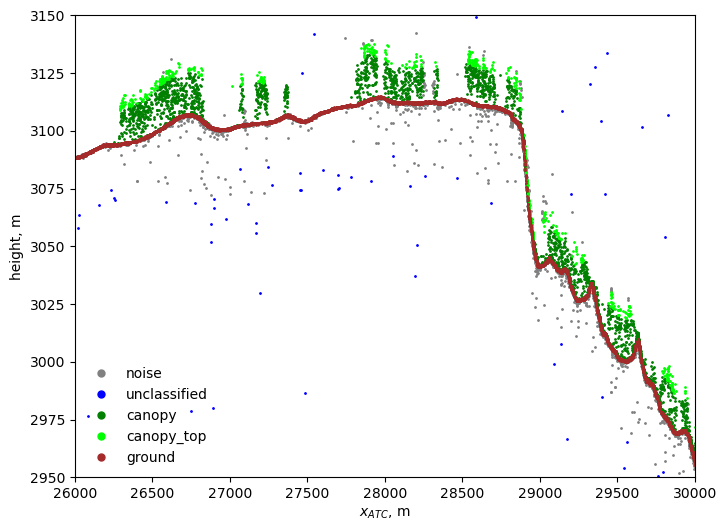

In [11]:
plt.figure(figsize=[8,6])

colors={0:['gray', 'noise'], 
        4:['blue','unclassified'],  
        2:['green','canopy'], 
        3:['lime', 'canopy_top'], 
        1:['brown', 'ground']}
d0=np.min(D3['segment_dist'])
for class_val, color_name in colors.items():
    ii=D3['atl08_class']==class_val
    plt.plot(D3['segment_dist'][ii]+D3['distance'][ii]-d0, D3['height'][ii],'o', 
         markersize=1, color=color_name[0], label=color_name[1])
hl=plt.legend(loc=3, frameon=False, markerscale=5)
plt.gca().set_xlim([26000, 30000])
plt.gca().set_ylim([2950, 3150])

plt.ylabel('height, m')
plt.xlabel('$x_{ATC}$, m');

### Plot the YAPC classifications

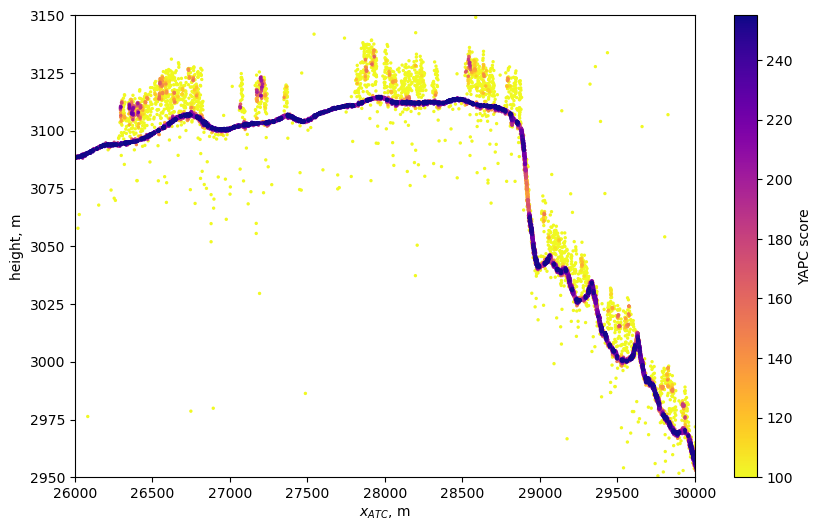

In [9]:
plt.figure(figsize=[10,6])

d0=np.min(D3['segment_dist'])
ii=np.argsort(D3['yapc_score'])
plt.scatter(D3['segment_dist'][ii]+D3['distance'][ii]-d0,
    D3['height'][ii],2, c=D3['yapc_score'][ii],
    vmin=100, vmax=255, cmap='plasma_r')
plt.colorbar(label='YAPC score')
plt.gca().set_xlim([26000, 30000])
plt.gca().set_ylim([2950, 3150])

plt.ylabel('height, m')
plt.xlabel('$x_{ATC}$, m');